In [1]:
import pandas as pd
import math

In [2]:
df = pd.read_csv('samplevalue.csv', header=None, names=['t', 'v'])

<AxesSubplot:xlabel='t'>

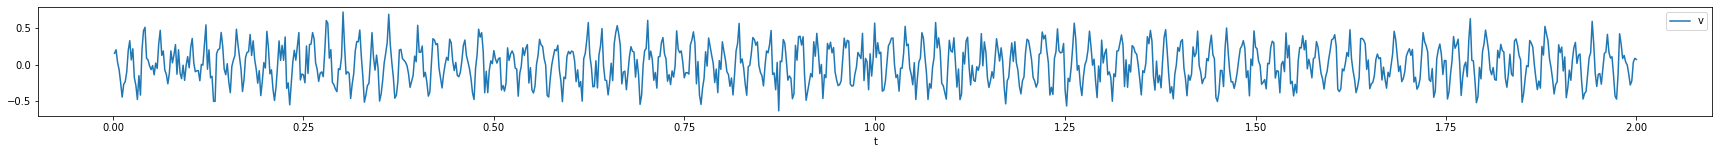

In [3]:
df.plot(x='t', y='v', figsize=(30, 2))

In [5]:
# 直交検波
f = 50
omega = 2 * math.pi * f
dt = 0.002
T = dt * len(df)

df["sin"] = df["t"].apply(lambda x: math.sin(omega * x) * dt)
df["i"] = df["v"] * df["sin"]
df["cos"] = df["t"].apply(lambda x: math.cos(omega * x) * dt)
df["q"] = df["v"] * df["cos"]

I = df["i"].sum() / T
Q = df["q"].sum() / T
A = 2 * math.sqrt(I**2 + Q**2)
phi = math.atan(Q / I)

print(f"A\t{A}")
print(f"phi\t{phi}")

A	0.2993537284670882
phi	1.0364319491100027


In [10]:
// 確認してみる
df["y"] = df["t"].apply(lambda x: A * math.sin(omega * x + phi))

<AxesSubplot:xlabel='t'>

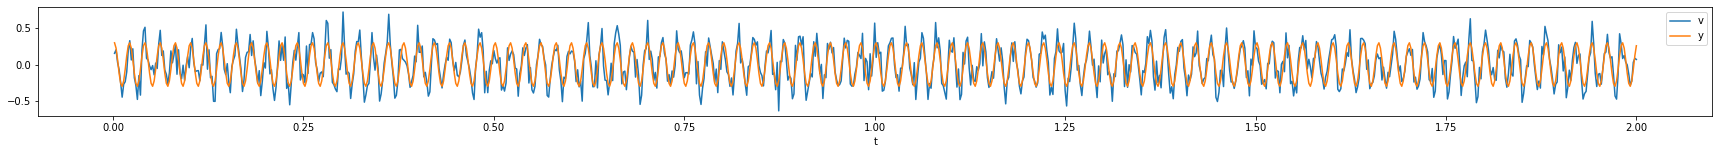

In [13]:
df.plot(x='t', y='y', figsize=(30, 2), ax = df.plot(x='t', y='v', figsize=(30, 2)))

うまく直交検波できているといえる